In [1]:
!git clone https://gist.github.com/c1a8c0359fbde2f6dcb92065b8ffc5e3.git

Cloning into 'c1a8c0359fbde2f6dcb92065b8ffc5e3'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Receiving objects: 100% (3/3), 17.91 KiB | 5.97 MiB/s, done.


In [4]:
import pandas
headlines_df = pandas.read_csv('datetest.csv')
headlines_df.head()

,News,Date
0,"Amazon, Meta, Booking, Uber on top at Wedbush ...","Dec. 28, 2023"
1,Amazon Prime is getting ads. How does it stack...,"Dec. 27, 2023"
2,Anthropic eyes over $850M in annualized revenu...,"Dec. 27, 2023"
3,Amazon gets FDA letter on potentially harmful ...,"Dec. 27, 2023"
4,"Amazon Prime getting ads next month, or pay fo...","Dec. 26, 2023"


In [6]:
import numpy as np

headlines_array = np.array(headlines_df)
np.random.shuffle(headlines_array)
headlines_list = list(headlines_array[:,1])

print(headlines_list)

['Dec. 27, 2023', 'Dec. 26, 2023', 'Dec. 21, 2023', 'Dec. 28, 2023', 'Dec. 27, 2023', 'Dec. 27, 2023', 'Dec. 22, 2023']


In [ ]:
!pip install transformers

#Getting the tokenizer and the model

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

     |████████████████████████████████| 2.9 MB 2.0 MB/s 
     |████████████████████████████████| 636 kB 51.6 MB/s 
     |████████████████████████████████| 895 kB 55.8 MB/s 
     |████████████████████████████████| 3.3 MB 34.9 MB/s 
     |████████████████████████████████| 52 kB 2.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer(headlines_list, padding = True, truncation = True, return_tensors='pt')
print(inputs)

{'input_ids': tensor([[  101, 14595,  3286,  ...,     0,     0,     0],
        [  101,  1037,  1010,  ...,     0,     0,     0],
        [  101, 21320,  2380,  ...,     0,     0,     0],
        ...,
        [  101, 29003,  3372,  ...,     0,     0,     0],
        [  101, 29003,  3372,  ...,     0,     0,     0],
        [  101, 29003,  3372,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
#inference

outputs = model(**inputs)
print(outputs.logits.shape)

torch.Size([300, 3])


In [ ]:
#Postprocessing with softmax

import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.0964, 0.0160, 0.8876],
        [0.0415, 0.0191, 0.9393],
        [0.0849, 0.0136, 0.9015],
        [0.1050, 0.0154, 0.8796],
        [0.0301, 0.2596, 0.7104],
        [0.0500, 0.0232, 0.9268],
        [0.0861, 0.0104, 0.9035],
        [0.1573, 0.0145, 0.8282],
        [0.0244, 0.4719, 0.5037],
        [0.3373, 0.0271, 0.6356],
        [0.1070, 0.0156, 0.8774],
        [0.3582, 0.0639, 0.5779],
        [0.8495, 0.0150, 0.1355],
        [0.0293, 0.0562, 0.9145],
        [0.0120, 0.9527, 0.0354],
        [0.1152, 0.0142, 0.8706],
        [0.1175, 0.0404, 0.8421],
        [0.0702, 0.0160, 0.9138],
        [0.0983, 0.0122, 0.8895],
        [0.7944, 0.0078, 0.1978],
        [0.0284, 0.0274, 0.9442],
        [0.0918, 0.1666, 0.7415],
        [0.9438, 0.0381, 0.0181],
        [0.0744, 0.0115, 0.9141],
        [0.0388, 0.0993, 0.8619],
        [0.8817, 0.0675, 0.0509],
        [0.6302, 0.0173, 0.3525],
        [0.0527, 0.0258, 0.9214],
        [0.8158, 0.0283, 0.1559],
        [0.040

In [ ]:
#Model classes

model.config.id2label

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [ ]:
#Formatting the results as a pandas data frame

import pandas as pd

#Headline #Positive #Negative #Neutral
positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

table = {'Headline':headlines_list,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral}

df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])

df.tail(5)


,Headline,Positive,Negative,Neutral
0,"TDAM USA Inc. Buys Phillips 66, DuPont de Nemo...",0.096404,0.015965,0.887631
1,"A, CSCO, NTAP and WPG among after hour movers",0.041545,0.019125,0.939330
2,Napier Park Global Capital LLC Buys Invesco Se...,0.084920,0.013624,0.901456
3,Stifel likes Illumina in premarket analyst action,0.105007,0.015381,0.879612
4,What's in the Offing for TripAdvisor's (TRIP) ...,0.030088,0.259559,0.710353


In [ ]:
# Sentiment score calculation
def calculate_sentiment_score(row):
    pos_score = row['positive_score']
    neg_score = row['negative_score']
    neu_score = row['neutral_score']

    # Normalize scores to range from 0 to 1
    total = pos_score + neg_score + neu_score
    pos_norm = pos_score / total
    neg_norm = neg_score / total
    neu_norm = neu_score / total

    # Calculate sentiment score between -1 and 1
    sentiment_score = (pos_norm - neg_norm) * (1 - neu_norm)

    return sentiment_score

df['score'] = df.apply(calculate_sentiment_score, axis=1)

In [ ]:
df.to_csv('sentiment.csv')

Sample Data

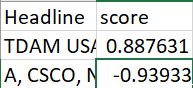